i: 0 cost: 1968.2549675611544 error: 0.794
i: 10 cost: 1926.2124074981502 error: 0.782
i: 20 cost: 1920.2380326837974 error: 0.774
i: 30 cost: 1915.326034294341 error: 0.771
i: 40 cost: 1911.0679940989698 error: 0.769
i: 50 cost: 1907.3402622347355 error: 0.765
i: 60 cost: 1904.0466316471534 error: 0.759
i: 70 cost: 1901.1091165285252 error: 0.757
i: 80 cost: 1898.4645887750069 error: 0.756
i: 90 cost: 1896.062020663987 error: 0.752
i: 100 cost: 1893.8601794913102 error: 0.751
i: 110 cost: 1891.8257277861262 error: 0.75
i: 120 cost: 1889.9316753934836 error: 0.751
i: 130 cost: 1888.1561282807038 error: 0.751
i: 140 cost: 1886.4812826844932 error: 0.752
i: 150 cost: 1884.892619348026 error: 0.749
i: 160 cost: 1883.3782593871806 error: 0.745
i: 170 cost: 1881.9284498576803 error: 0.746
i: 180 cost: 1880.5351529421146 error: 0.747
i: 190 cost: 1879.1917176894522 error: 0.743
i: 200 cost: 1877.8926174211767 error: 0.741
i: 210 cost: 1876.6332393413118 error: 0.742
i: 220 cost: 1875.4097156

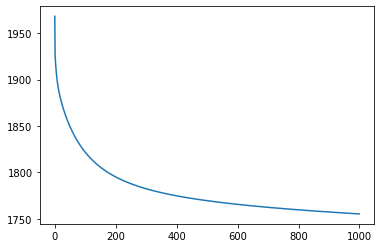

0.33099999999999996


In [1]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/DS:Deep Learning in Python/facial expression recognition')

from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

from util import getData, softmax, cost, y2indicator, error_rate
from sklearn.utils import shuffle

class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, Xvalid, Yvalid, learning_rate=1e-7, reg=0., epochs=10000, show_fig=False):
        Tvalid = y2indicator(Yvalid)

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K)/np.sqrt(D)
        self.b = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            #forward pass and cost calculation
            pY = self.forward(X)

            #gradient descent step
           
            self.W -= learning_rate* (X.T.dot(pY - T) + reg * self.W)
            self.b -= learning_rate*((pY - T).sum(axis=0) + reg * self.b)

            if i % 10 ==0:
                pYvalid = self.forward(Xvalid)
                c = cost(Tvalid, pYvalid) 
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best validation error:" , best_validation_error)    

        if show_fig:
            plt.plot(costs)
            plt.show()

    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)

    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)
                         
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)
                
    
def main():
    Xtrain, Ytrain, Xvalid, Yvalid = getData()

    model = LogisticModel()
    model.fit(Xtrain, Ytrain, Xvalid, Yvalid, show_fig=True)
    print(model.score(Xvalid, Yvalid))

if __name__== '__main__':
    main()



